## Logisitic Regression Implementation

In this module, we will use the LogisticRegression class from scikit-learn to quickly build a predictive model and leverage built-in evaluation metrics to assess and compare model performance.

This project will follow the four phases of a standard machine learning workflow:

1. **Phase 1 – Data Cleaning & Exploratory Analysis**
Prepare the dataset by handling missing values, correcting inconsistencies, transforming features, and analyzing patterns to understand relationships in the data.

2. **Phase 2 – Model Training**
Fit the Logistic Regression model using the training subset of the data, allowing the algorithm to learn the relationship between input features and the target variable.

3. **Phase 3 – Model Testing**
Evaluate the trained model on unseen test data to measure generalization performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

4. **Phase 4 – Model Comparison & Interpretation**
Compare results across metrics, interpret model strengths and weaknesses, and determine whether adjustments or alternative models are needed for improved performance.

## Phase 1 - Data Cleaning/Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from textwrap import wrap

# Import data from CSV
data_df = pd.read_csv('/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Logistic Regression/diabetes_data_upload.csv')

# Convert data frame to numpy array
data = data_df.to_numpy()

data_df[:10]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


The raw dataframe is not yet suitable for machine learning. We will convert categorical values into numerical form (e.g., 0/1 for male/female or positive/negative), standardize the age column to align its scale with other features, and add a column of ones to serve as the model bias.

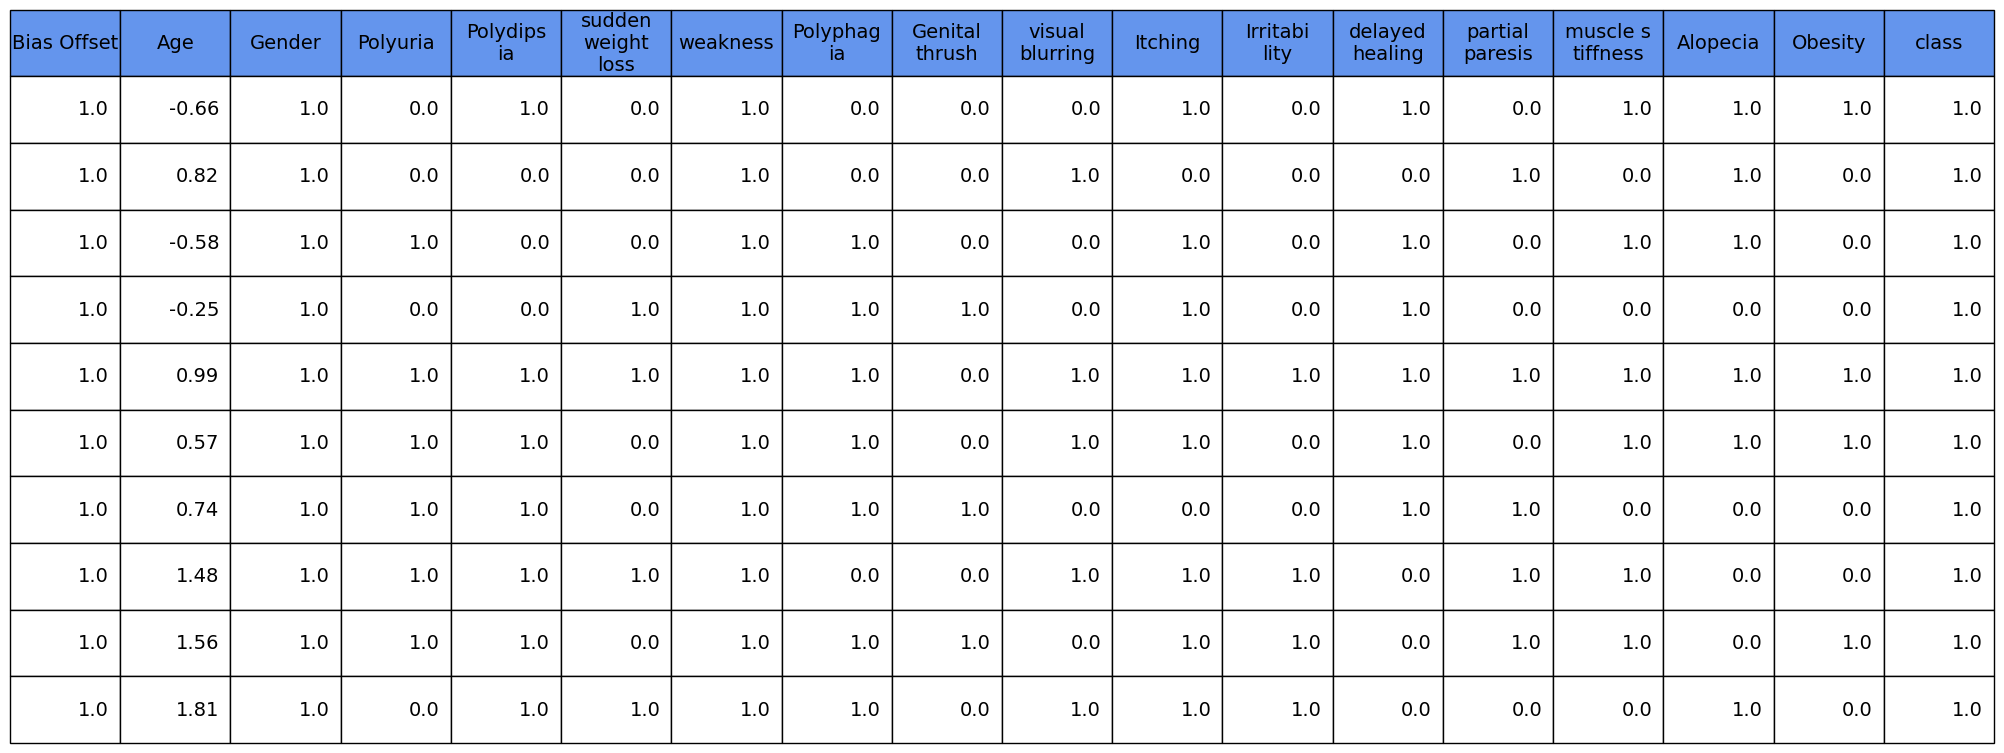

In [4]:
# reset data array incase cell is ran multiple times
data = data_df.to_numpy()

# Calculate average
age_mu = sum(data[:,0])/len(data[:,0])

# Calculate standard deviation
age_sigma = np.sqrt((1/len(data[:,0]))*sum((data[:,0] - age_mu)**2))

# Calculate standardized age
age_stand = (data[:,0] - age_mu)/age_sigma

# Replace the age with the standardized age
data[:,0] = age_stand

# Change text to a 1 or 0
for i in range(len(data[:,0])):
    for j, value in enumerate(data[i,:]):
        # Change true, yes, positive, and male to a 1
        if (value == 'True') or (value == 'Yes') or (value == 'Positive') or (value == 'Male'):
            data[i,j] = 1
        # Change no, negative, female to a 0
        elif (value == 'No') or (value == 'Negative') or (value == 'Female'):
            data[i,j] = 0

# Add a column of ones for the bias
data = np.c_[np.ones(data.shape[0]), data]

# Round the data to fit the table
data = np.round(np.array(data, np.float32), 2)


# Display data in a table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Add column names
label = ['\n'.join(wrap(l, 8)) for l in data_df.columns]

# Name the bias column of 1s
label = ["Bias Offset"] + label

table = plt.table(cellText = data[:10,:],
                  colLabels = label,
                  colColours=["cornflowerblue"]*len(data[0,:]),
                  loc = 'center')

table.scale(4,4)
table.auto_set_font_size(False)
table.set_fontsize(14)


The cleaned dataset is now ready for modeling: all features are encoded numerically, the age column is normalized, and the bias term has been added.

Our next steps are to shuffle and split the dataset, train the model, test it, and review the performance metrics. With scikit-learn, this process is straightforward — it provides tools for train-test splitting, model training, and convenient functions to display evaluation results such as the confusion matrix and F-score.

## Phase 2: Train the model
In this phase, we prepare the data for model training. We will shuffle and split the dataset using scikit-learn’s train_test_split, then create a Logistic Regression model using the LogisticRegression class and fit the training data to it.


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], train_size=0.75, random_state=42)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression()

## Phase 3: Test the Model
With training complete, the next step is to evaluate how well the model performs on unseen data. We will use the test portion of our dataset—kept separate during training—to generate predictions and then examine the resulting performance metrics. This will show how accurately the model can generalize beyond the data it learned from.

Logistic Regression Model Performance Metrics
Accuracy : 0.93
Precision: 0.94
Recall   : 0.95
F1 Score : 0.95

Classification Report:

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90        46
    Positive       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



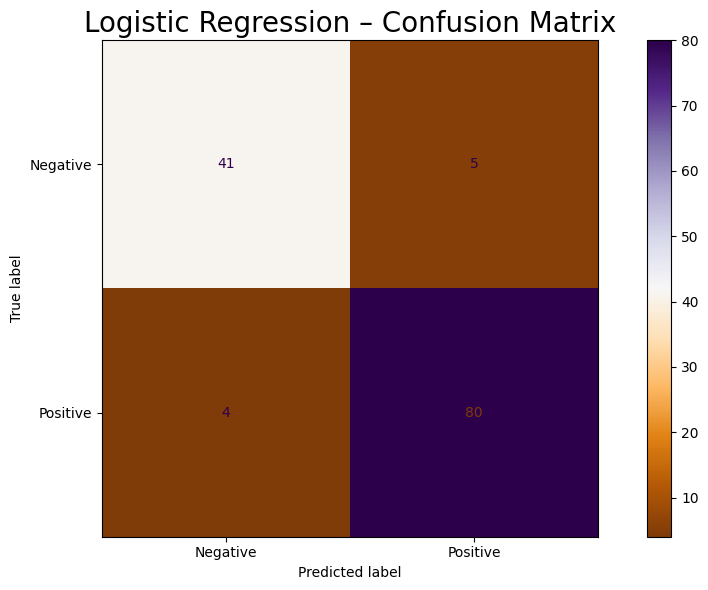

In [12]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score
)

# Predict on test set
y_hat = model.predict(X_test)

# ---- Metrics ----
acc  = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
rec  = recall_score(y_test, y_hat)
f1   = f1_score(y_test, y_hat)

print("Logistic Regression Model Performance Metrics")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}\n")

# Detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_hat, target_names=["Negative", "Positive"]))

# ---- Confusion Matrix Visualization ----
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_title("Logistic Regression – Confusion Matrix", fontsize=20)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_hat,
    display_labels=["Negative", "Positive"],
    cmap="PuOr",          # keep your original colormap
    colorbar=True,
    ax=ax
)

plt.tight_layout()
plt.show()


## Phase 4: Model Comparison
The classification model scores are as follows: Perceptron – 0.94, MLP (Tanh, ReLU activation) – 1.00, Logistic Regression – 0.95. Scores for the remaining models — Decision Tree, KNN, and SVM — are still pending evaluation.

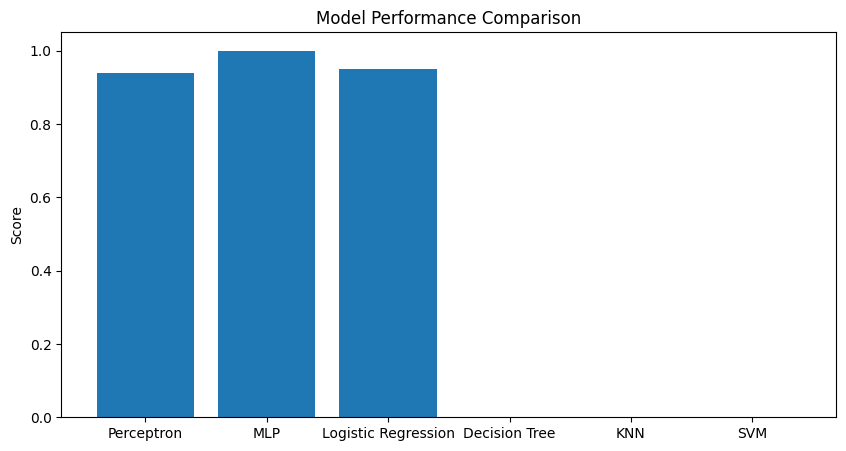

In [13]:
model_scores = {
    "Perceptron": 0.94,
    "MLP": 1.00,
    "Logistic Regression": 0.95,
    "Decision Tree": None,
    "KNN": None,
    "SVM": None
}

names = list(model_scores.keys())
values = [v if v is not None else 0 for v in model_scores.values()]

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.show()
